In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


/home/n/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=1024,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 118us/step - loss: 0.5785 - acc: 0.7135 - val_loss: 0.4257 - val_acc: 0.8573
Epoch 2/10
15000/15000 [==============================] - 1s 67us/step - loss: 0.3493 - acc: 0.8767 - val_loss: 0.3426 - val_acc: 0.8666
Epoch 3/10
15000/15000 [==============================] - 1s 66us/step - loss: 0.2511 - acc: 0.9127 - val_loss: 0.2987 - val_acc: 0.8797
Epoch 4/10
15000/15000 [==============================] - 1s 66us/step - loss: 0.1933 - acc: 0.9333 - val_loss: 0.2753 - val_acc: 0.8925
Epoch 5/10
15000/15000 [==============================] - 1s 66us/step - loss: 0.1635 - acc: 0.9421 - val_loss: 0.2807 - val_acc: 0.8887
Epoch 6/10
15000/15000 [==============================] - 1s 66us/step - loss: 0.1503 - acc: 0.9461 - val_loss: 0.2893 - val_acc: 0.8902
Epoch 7/10
15000/15000 [==============================] - 1s 66us/step - loss: 0.1216 - acc: 0.9573 - val_loss: 0.3137 - val_ac

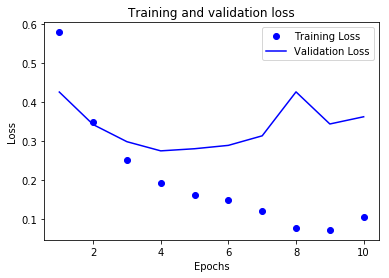

In [36]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

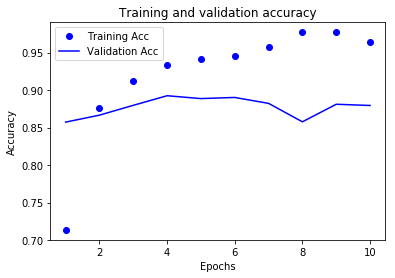

In [37]:
plt.clf()

val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=6,
    batch_size=512
)
results = model.evaluate(x_test, y_test)
results

# history_dict = history.history
# loss_values = history_dict['loss']
# val_loss_values = history_dict['val_loss']
# acc = history_dict['acc']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

Epoch 1/6
25000/25000 [==============================] - 2s 67us/step - loss: 0.4390 - acc: 0.8123
Epoch 2/6
25000/25000 [==============================] - 1s 45us/step - loss: 0.2446 - acc: 0.9094
Epoch 3/6
25000/25000 [==============================] - 1s 48us/step - loss: 0.1908 - acc: 0.9289
Epoch 4/6
25000/25000 [==============================] - 1s 46us/step - loss: 0.1506 - acc: 0.9454
Epoch 5/6
25000/25000 [==============================] - 1s 45us/step - loss: 0.1263 - acc: 0.9533
Epoch 6/6
25000/25000 [==============================] - 2s 68us/step


[0.4003602418494225, 0.86812]

In [27]:
model.predict(x_test)

array([[0.2587954 ],
       [0.9979043 ],
       [0.93720794],
       ...,
       [0.17157114],
       [0.10602579],
       [0.6250085 ]], dtype=float32)